### Global Optimization

In this example we will implement the Eggholder function. Is is a difficult function to optimize, because of the large number of local minima.

We can describe Eggholder function as

$$ f(x) = -(x_{2}+47)sin(\sqrt{|x_{2}+\frac{x_{1}}{2}+47|})-x_{1}sin(\sqrt{|x_{1}-x_{2}+47|}) $$

This function is usually evaluated on the square $x_{i}\in [-512, 512],~\forall i=1,2$


In [3]:
import numpy as np

def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47))))
            -x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

bounds = [(-512, 512), (-512, 512)]

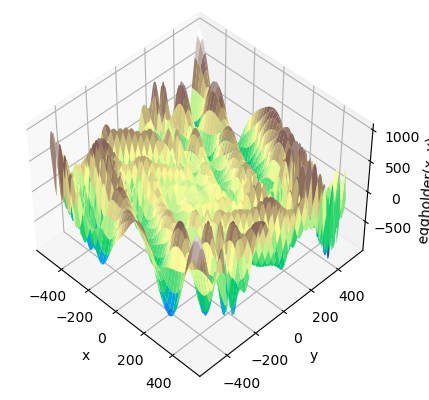

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(-512, 513)
y = np.arange(-512, 513)
xgrid, ygrid = np.meshgrid(x, y)
xy = np.stack([xgrid, ygrid])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, -45)
ax.plot_surface(xgrid, ygrid, eggholder(xy), cmap='terrain')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('eggholder(x, y)')
plt.show()

In [5]:
from scipy import optimize
results = dict()
results['shgo'] = optimize.shgo(eggholder, bounds)
results['shgo']

 message: Optimization terminated successfully.
 success: True
     fun: -935.3379515604948
    funl: [-9.353e+02]
       x: [ 4.395e+02  4.540e+02]
      xl: [[ 4.395e+02  4.540e+02]]
     nit: 1
    nfev: 47
   nlfev: 42
   nljev: 10
   nlhev: 0

In [6]:
results['DA'] = optimize.dual_annealing(eggholder, bounds)
results['DA']

 message: ['Maximum number of iteration reached']
 success: True
  status: 0
     fun: -935.3379515601647
       x: [ 4.395e+02  4.540e+02]
     nit: 1000
    nfev: 4085
    njev: 28
    nhev: 0

In [7]:
results['DE'] = optimize.differential_evolution(eggholder, bounds)

In [8]:
results['shgo_sobol'] = optimize.shgo(eggholder, bounds, n=200, iters=5,
                                      sampling_method='sobol')

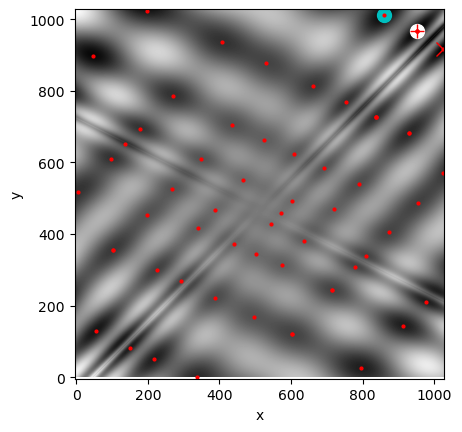

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.imshow(eggholder(xy), interpolation='bilinear', origin='lower',
               cmap='gray')
ax.set_xlabel('x')
ax.set_ylabel('y')

def plot_point(res, marker='o', color=None):
    ax.plot(512+res.x[0], 512+res.x[1], marker=marker, color=color, ms=10)

plot_point(results['DE'], color='c')  # differential_evolution - cyan
plot_point(results['DA'], color='w')  # dual_annealing.        - white

# SHGO produces multiple minima, plot them all (with a smaller marker size)
plot_point(results['shgo'], color='r', marker='+')
plot_point(results['shgo_sobol'], color='r', marker='x')
for i in range(results['shgo_sobol'].xl.shape[0]):
    ax.plot(512 + results['shgo_sobol'].xl[i, 0],
            512 + results['shgo_sobol'].xl[i, 1],
            'ro', ms=2)

ax.set_xlim([-4, 514*2])
ax.set_ylim([-4, 514*2])
plt.show()